<a href="https://colab.research.google.com/github/jtakashiba/data_science_portfolio/blob/main/UK_house_prices_Bristol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices in the UK (1995 - 2017)

House Price Analysis using data from the UK land registry.

Data source: https://www.kaggle.com/datasets/hm-land-registry/uk-housing-prices-paid

Initial analysis was perfo on entire dataset, following by a more detailed analysis on the Bristol City.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px

In [ ]:
# Define a function to format the numbers
def millions_formatter(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.0f}M'  # Convert to M (millions)
    elif x >= 1_000:
        return f'{x/1_000:.0f}K'  # Convert to K (thousands)
    else:
        return str(int(x))  # Keep small numbers as is

# Loading the data



In [ ]:
import os
import zipfile

# Check if running in Google Colab
try:
    from google.colab import drive
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

def load_data(zip_path):
    extract_path = "./data"  # Use a relative path

    if IN_COLAB:
        print("Running in Google Colab - Mounting Drive...")
        drive.mount('/content/drive')

    print(f"Extracting data from {zip_path} to {extract_path}...")

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

    print("Extraction done!")

In [ ]:
zip_file = "/content/drive/MyDrive/your_dataset.zip"  if IN_COLAB else "./data/UK_house_prices_data.zip"
load_data(zip_file)

Mounted at /content/drive
Extraction done!


In [ ]:
data = pd.read_csv("/content/data/price_paid_records.csv")

In [ ]:
data.head()

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only
0,{81B82214-7FBC-4129-9F6B-4956B4A663AD},25000,1995-08-18 00:00,T,N,F,OLDHAM,OLDHAM,GREATER MANCHESTER,A,A
1,{8046EC72-1466-42D6-A753-4956BF7CD8A2},42500,1995-08-09 00:00,S,N,F,GRAYS,THURROCK,THURROCK,A,A
2,{278D581A-5BF3-4FCE-AF62-4956D87691E6},45000,1995-06-30 00:00,T,N,F,HIGHBRIDGE,SEDGEMOOR,SOMERSET,A,A
3,{1D861C06-A416-4865-973C-4956DB12CD12},43150,1995-11-24 00:00,T,N,F,BEDFORD,NORTH BEDFORDSHIRE,BEDFORDSHIRE,A,A
4,{DD8645FD-A815-43A6-A7BA-4956E58F1874},18899,1995-06-23 00:00,S,N,F,WAKEFIELD,LEEDS,WEST YORKSHIRE,A,A


**Property Type:**

D = Detached, S = Semi-Detached, T = Terraced, F = Flats/Maisonettes, O = Other

Y = a newly built property, N = an established residential building

**Duration**:

F = Freehold, L= Leasehold etc.

**PPD** Price Paid transaction:

A = Standard Price Paid entry, includes single residential property sold for full market value.
B = Additional Price Paid entry including transfers under a power of sale/repossessions, buy-to-lets (where they can be identified by a Mortgage) and transfers to non-private individuals.

**Record Status**:

A = Addition
C = Change
D = Delete.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22489348 entries, 0 to 22489347
Data columns (total 11 columns):
 #   Column                             Dtype 
---  ------                             ----- 
 0   Transaction unique identifier      object
 1   Price                              int64 
 2   Date of Transfer                   object
 3   Property Type                      object
 4   Old/New                            object
 5   Duration                           object
 6   Town/City                          object
 7   District                           object
 8   County                             object
 9   PPDCategory Type                   object
 10  Record Status - monthly file only  object
dtypes: int64(1), object(10)
memory usage: 1.8+ GB


In [ ]:
print(data.isna().any())
print(data.isnull().any())

Transaction unique identifier        False
Price                                False
Date of Transfer                     False
Property Type                        False
Old/New                              False
Duration                             False
Town/City                            False
District                             False
County                               False
PPDCategory Type                     False
Record Status - monthly file only    False
Year                                 False
dtype: bool
Transaction unique identifier        False
Price                                False
Date of Transfer                     False
Property Type                        False
Old/New                              False
Duration                             False
Town/City                            False
District                             False
County                               False
PPDCategory Type                     False
Record Status - monthly file only    False

In [ ]:
print(data['County'].nunique(), 'unique Counties')
print(data['District'].nunique(), 'unique Districts')
print(data['Town/City'].nunique(), 'unique Towns')

127 unique Counties
454 unique Districts
1170 unique Towns


In [ ]:
data['County'].value_counts().head(10)

,count
County,
GREATER LONDON,2993422
GREATER MANCHESTER,985772
WEST MIDLANDS,856803
WEST YORKSHIRE,849862
KENT,636515
ESSEX,629488
HAMPSHIRE,593974
SURREY,516199
LANCASHIRE,503502


In [ ]:
data['District'].value_counts().head(10)

,count
District,
BIRMINGHAM,332091
LEEDS,299133
BRADFORD,198163
MANCHESTER,181363
SHEFFIELD,181222
CITY OF BRISTOL,174853
WANDSWORTH,156602
KIRKLEES,151424
LIVERPOOL,150032


In [ ]:
data['Town/City'].value_counts().head(10)

,count
Town/City,
LONDON,1784194
MANCHESTER,366133
BRISTOL,344839
BIRMINGHAM,330358
NOTTINGHAM,292532
LEEDS,252680
LIVERPOOL,223324
SHEFFIELD,212669
LEICESTER,197593


## Bristol Data

As this is a big dataset, let's focus our attention to Bristol.

In [ ]:
data['Year'] = pd.to_datetime(data['Date of Transfer']).dt.year
df_bristol = data[data['Town/City'] == 'BRISTOL']
df_bristol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 344839 entries, 40 to 22488519
Data columns (total 12 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Transaction unique identifier      344839 non-null  object
 1   Price                              344839 non-null  int64 
 2   Date of Transfer                   344839 non-null  object
 3   Property Type                      344839 non-null  object
 4   Old/New                            344839 non-null  object
 5   Duration                           344839 non-null  object
 6   Town/City                          344839 non-null  object
 7   District                           344839 non-null  object
 8   County                             344839 non-null  object
 9   PPDCategory Type                   344839 non-null  object
 10  Record Status - monthly file only  344839 non-null  object
 11  Year                               344839 non-null  in

In [ ]:
df_bristol

,Unnamed: 0,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only,Year
0,40,{E9B43BCF-A64C-4B1B-98D6-4239956F2F2A},255000,1995-06-30 00:00,D,Y,F,BRISTOL,WOODSPRING,AVON,A,A,1995
1,171,{C1EF2944-FE3F-4BB4-B4FD-8AC483333F6F},46500,1995-01-17 00:00,T,N,F,BRISTOL,BRISTOL,AVON,A,A,1995
2,401,{CC67C88D-46C9-420A-A7A6-3B19DCF75ACF},39000,1995-06-30 00:00,T,N,F,BRISTOL,BRISTOL,AVON,A,A,1995
3,416,{FC664B43-97E8-42BB-A5B8-3EAB0D0AD959},59999,1995-06-27 00:00,T,N,F,BRISTOL,BRISTOL,AVON,A,A,1995
4,608,{6DB12175-E179-4F0A-A120-21D486C3E9C0},47000,1995-12-08 00:00,S,N,F,BRISTOL,SOUTH GLOUCESTERSHIRE,SOUTH GLOUCESTERSHIRE,A,A,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...
344834,22488515,{4E95D757-21CA-EDA1-E050-A8C0630539E2},322500,2017-03-29 00:00,T,N,F,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,A,2017
344835,22488516,{4E95D757-21CB-EDA1-E050-A8C0630539E2},485000,2017-03-30 00:00,T,N,F,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,A,2017
344836,22488517,{4E95D757-21CC-EDA1-E050-A8C0630539E2},520000,2017-01-27 00:00,T,N,L,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,A,2017
344837,22488518,{4E95D757-21CD-EDA1-E050-A8C0630539E2},240000,2017-04-11 00:00,S,N,F,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,A,2017


In [ ]:
df_bristol.to_csv('bristol_house_prices.csv')

In [ ]:
df_bristol['Price'].describe()

,Price
count,3.448390e+05
mean,1.742137e+05
std,2.866945e+05
min,1.000000e+01
25%,8.800000e+04
50%,1.460000e+05
75%,2.150000e+05
max,5.288056e+07


In [ ]:
df_bristol[df_bristol['Price'] < 1000]

,Unnamed: 0,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only,Year
1816,132355,{2A289E9F-BFE5-CDC8-E050-A8C063054829},400,1995-08-15 00:00,S,N,F,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,A,1995
4002,291181,{2A289E9C-E0C1-CDC8-E050-A8C063054829},35,1995-01-11 00:00,T,N,F,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,A,1995
4997,361293,{2A289E9D-BED8-CDC8-E050-A8C063054829},195,1995-08-14 00:00,S,N,F,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,A,1995
5054,365623,{2A289E9D-E82A-CDC8-E050-A8C063054829},500,1995-05-17 00:00,S,N,F,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,A,1995
5258,382060,{2A289E9E-FF04-CDC8-E050-A8C063054829},500,1995-05-26 00:00,T,N,F,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,A,1995
5383,393500,{2A289E9E-98F8-CDC8-E050-A8C063054829},50,1995-08-25 00:00,T,N,F,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,A,1995
17540,1223506,{2A289E9E-476F-CDC8-E050-A8C063054829},35,1996-02-12 00:00,T,N,F,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,A,1996
17722,1237663,{2A289E9E-2E5A-CDC8-E050-A8C063054829},10,1996-05-09 00:00,D,N,F,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,A,A,1996
17931,1253442,{2A289E9D-EB2A-CDC8-E050-A8C063054829},300,1996-05-24 00:00,D,N,F,BRISTOL,NORTH SOMERSET,NORTH SOMERSET,A,A,1996
18030,1260122,{2A289E9E-FFAA-CDC8-E050-A8C063054829},250,1996-03-20 00:00,T,N,F,BRISTOL,SOUTH GLOUCESTERSHIRE,SOUTH GLOUCESTERSHIRE,A,A,1996


In [ ]:
print('The Bristol Town includes:', df_bristol['County'].nunique(), 'counties and', df_bristol['District'].nunique(), 'districts')

The Bristol Town includes: 13 counties and 22 districts


In [ ]:
pivot = df_bristol.pivot_table(index=['County', 'District'], values='Price', aggfunc='count')
print(pivot)

                                                            Price
County                       District                            
AVON                         BATH                               1
                             BRISTOL                         5799
                             KINGSWOOD                       1498
                             NORTHAVON                       2658
                             WANSDYKE                         626
                             WOODSPRING                      1321
BATH AND NORTH EAST SOMERSET BATH AND NORTH EAST SOMERSET   14284
BRACKNELL FOREST             BRACKNELL FOREST                   5
CITY OF BRISTOL              CITY OF BRISTOL               174849
GLOUCESTERSHIRE              GLOUCESTER                        21
                             TEWKESBURY                         1
NORTH SOMERSET               NORTH SOMERSET                 36051
READING                      READING                            1
SLOUGH    

In [ ]:
district_counts = df_bristol.groupby(['Year', 'District']).size().reset_index(name='Count')
county_counts = df_bristol.groupby(['Year', 'County']).size().reset_index(name='Count')
year_counts = df_bristol.groupby(['Year']).size().reset_index(name='Count')

## Bristol sub-divisions (County/District)

Some insights regarding the Counties/Districts:
- For the most relevant data, counties and districts are the same, we will consider only one of them, the county data.
- Avon has only data up to 1996 because it was abolished in 1996 and it was succeeded by Bristol, Bath and North East Somerset, North Somerset and South Gloucestershire.


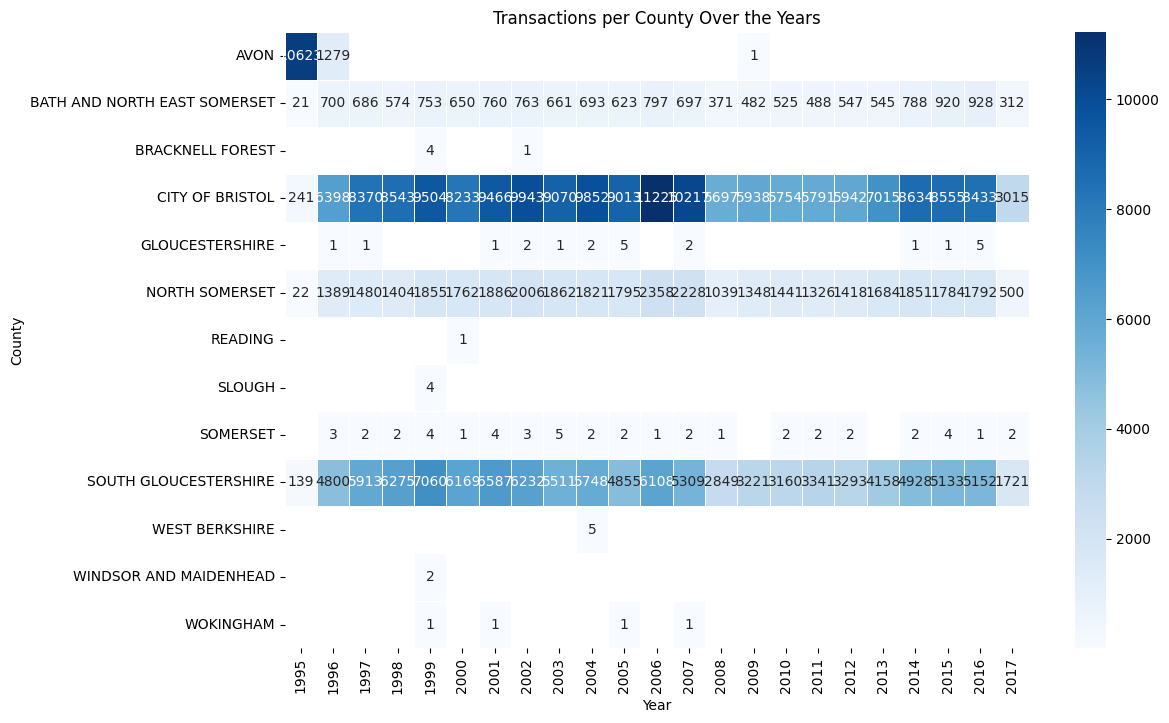

In [ ]:
pivot = county_counts.pivot(index='County', columns='Year', values='Count')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='Blues', annot=True, fmt='.0f', linewidths=0.5)

plt.xlabel('Year')
plt.ylabel('County')
plt.title('Transactions per County Over the Years')
plt.show()

In [ ]:
df_bristol.groupby(['District']).size().sort_values(ascending=False).head(5)

,0
District,
CITY OF BRISTOL,174849
SOUTH GLOUCESTERSHIRE,107662
NORTH SOMERSET,36051
BATH AND NORTH EAST SOMERSET,14284
BRISTOL,5799


In [ ]:
df_bristol.groupby(['County']).size().sort_values(ascending=False).head(5)

,0
County,
CITY OF BRISTOL,174849
SOUTH GLOUCESTERSHIRE,107662
NORTH SOMERSET,36051
BATH AND NORTH EAST SOMERSET,14284
AVON,11903


In [ ]:
top4_couties = df_bristol[df_bristol['County'].isin([
    'CITY OF BRISTOL',
    'SOUTH GLOUCESTERSHIRE',
    'NORTH SOMERSET',
    'BATH AND NORTH EAST SOMERSET',
    ])]

## Variation over the years - between 1995 and 2017

In this section we bring a general overview of the house prices in Bristol over the years.
As expected, there was a decrease on the prices in 2008 and prices started to go up again after 2012.

- Price Changes
- Rate of Price Changes
- Volatility

In [ ]:
price_trend_city = df_bristol.groupby(['Year'])['Price'].mean().reset_index()
fig = px.bar(price_trend_city, x='Year', y='Price', title="House Average Prices Over the Years")
fig.show()

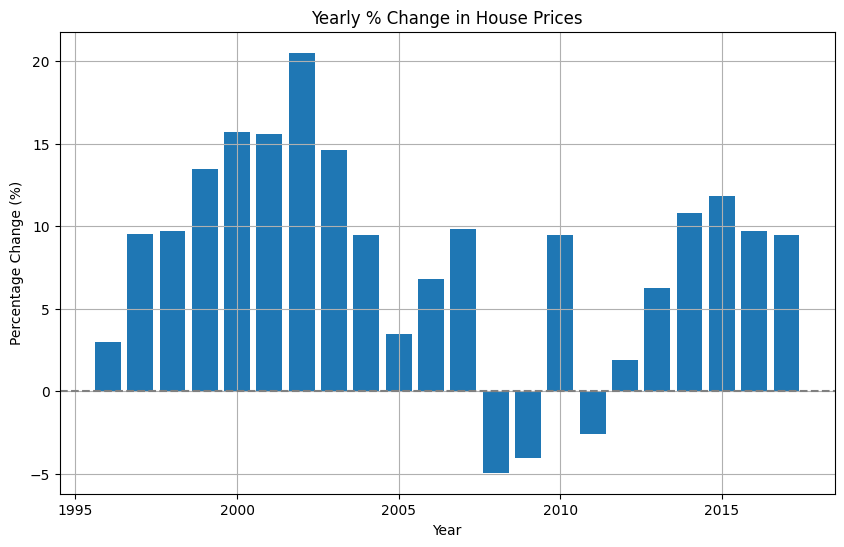

In [ ]:
yearly_prices = df_bristol.groupby(['Year'])['Price'].mean().reset_index()
yearly_prices['Price_Change'] = yearly_prices['Price'].diff()  # Absolute change
yearly_prices['Price_Percent_Change'] = yearly_prices['Price'].pct_change() * 100  # % change

plt.figure(figsize=(10, 6))
plt.bar(yearly_prices['Year'], yearly_prices['Price_Percent_Change'])

plt.axhline(0, color='gray', linestyle='--')  # Reference line at 0
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.title('Yearly % Change in House Prices')
plt.grid()
plt.show()


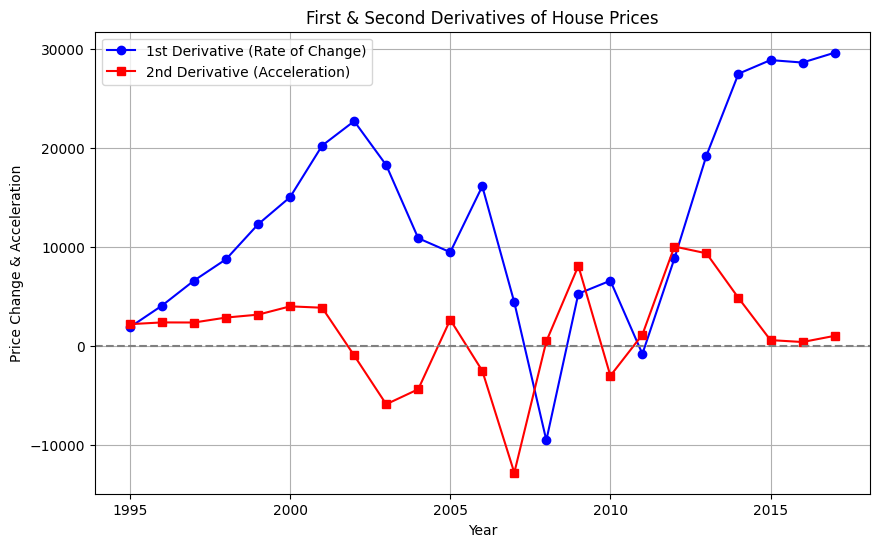

In [ ]:
# Compute first and second derivatives
yearly_prices['First_Derivative'] = np.gradient(yearly_prices['Price'])  # Price change
yearly_prices['Second_Derivative'] = np.gradient(yearly_prices['First_Derivative'])  # Acceleration

# Plot the results
plt.figure(figsize=(10, 6))

# Plot first derivative
plt.plot(yearly_prices['Year'], yearly_prices['First_Derivative'], marker='o', linestyle='-', color='b', label="1st Derivative (Rate of Change)")

# Plot second derivative
plt.plot(yearly_prices['Year'], yearly_prices['Second_Derivative'], marker='s', linestyle='-', color='r', label="2nd Derivative (Acceleration)")

plt.axhline(0, color='gray', linestyle='--')  # Reference line at 0
plt.xlabel("Year")
plt.ylabel("Price Change & Acceleration")
plt.title("First & Second Derivatives of House Prices")
plt.legend()
plt.grid()
plt.show()


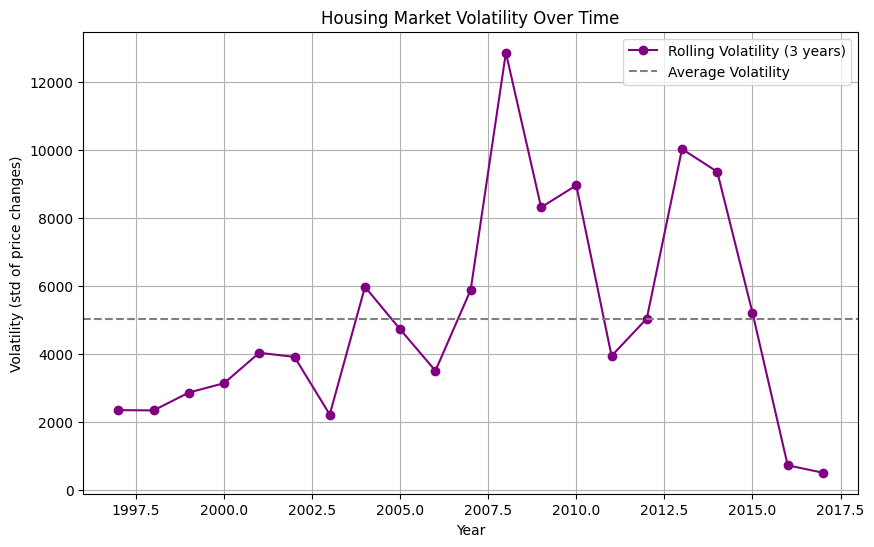

In [ ]:
yearly_prices['Volatility'] = yearly_prices['First_Derivative'].rolling(window=3).std()

plt.figure(figsize=(10, 6))
plt.plot(yearly_prices['Year'], yearly_prices['Volatility'], marker='o', linestyle='-', color='purple', label="Rolling Volatility (3 years)")
plt.xlabel("Year")
plt.ylabel("Volatility (std of price changes)")
plt.title("Housing Market Volatility Over Time")
plt.axhline(yearly_prices['Volatility'].mean(), color='gray', linestyle='--', label="Average Volatility")
plt.legend()
plt.grid()
plt.show()


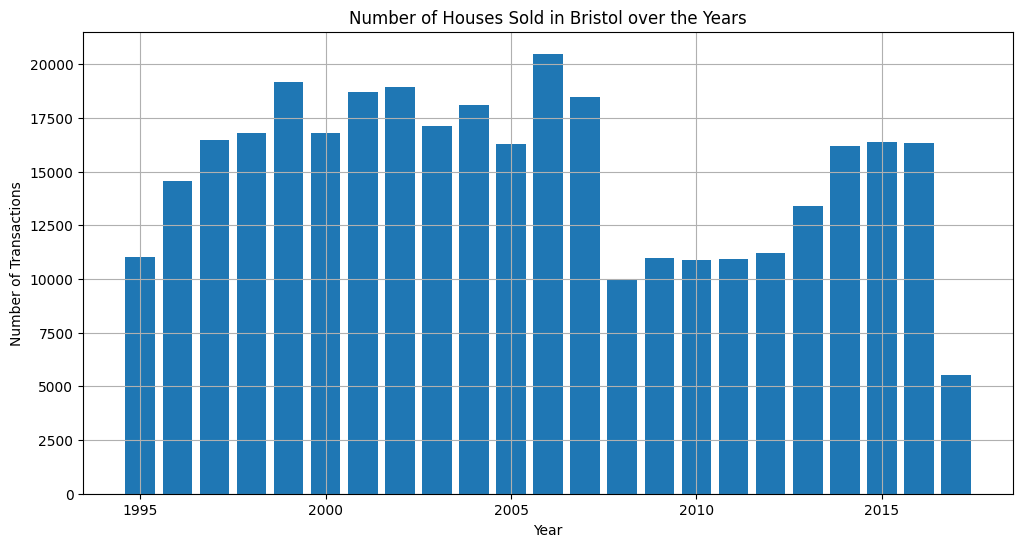

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(year_counts['Year'],year_counts['Count'])

plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.title('Number of Houses Sold in Bristol over the Years')
plt.grid()
plt.show()

# Price Distribution

The histogram below shows that there are very discrepant outliers in the data, i.e. houses significantly more expensive than the average.


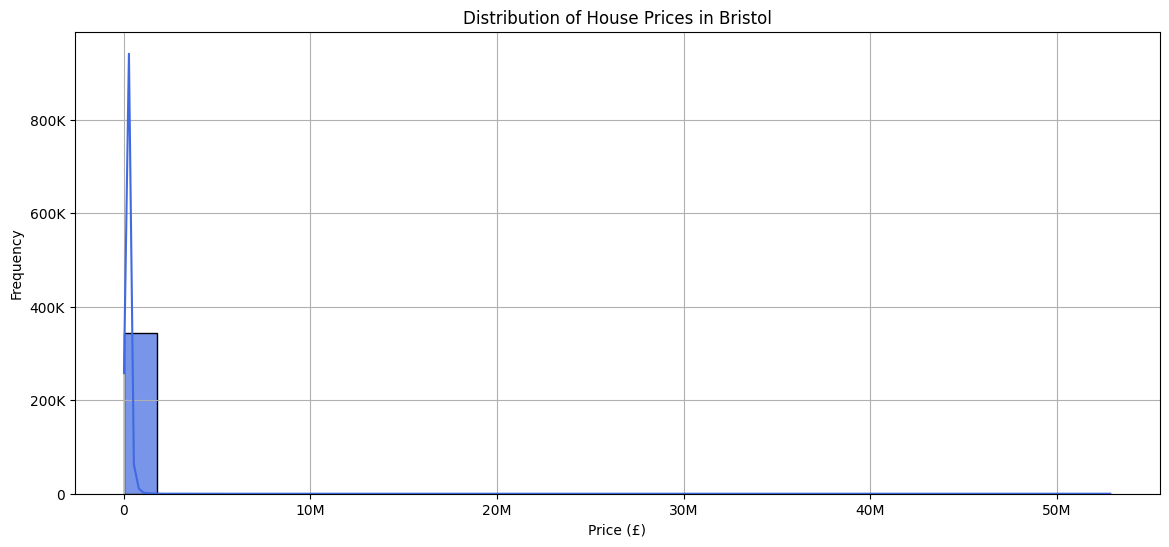

In [ ]:
plt.figure(figsize=(14, 6))
sns.histplot(df_bristol['Price'], bins=30, kde=True, color='royalblue', alpha=0.7)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices in Bristol')
plt.grid()
plt.show()

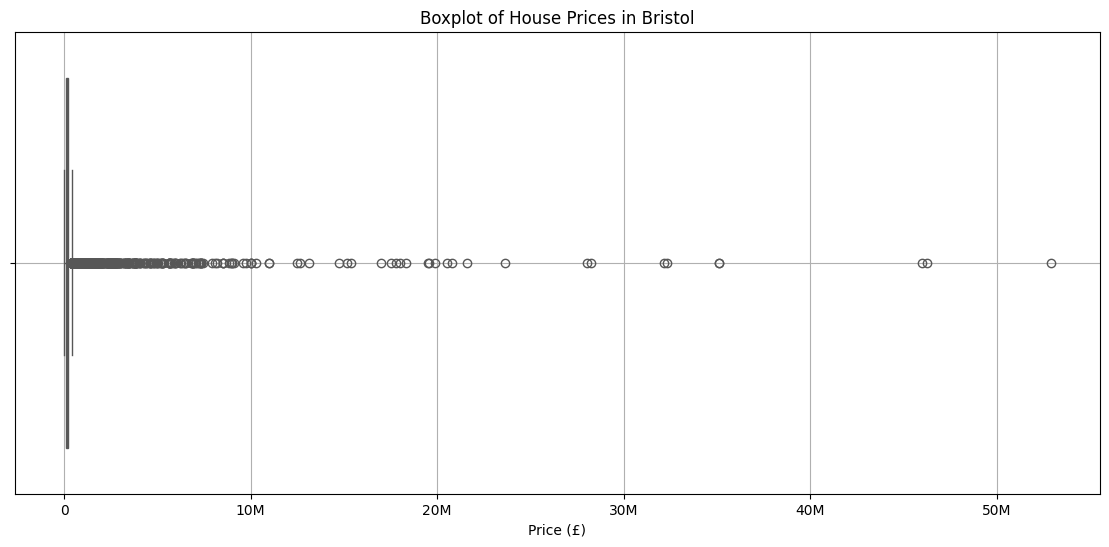

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x=df_bristol['Price'], color='royalblue')

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

plt.xlabel('Price (£)')
plt.title('Boxplot of House Prices in Bristol')
plt.grid()
plt.show()


In [ ]:
print('Most Expensive house sold in Bristol between 1995 and 2017:', df_bristol['Price'].max())
print('Average Price:', df_bristol['Price'].mean().round())

Q1 = df_bristol['Price'].quantile(0.25)
Q2 = df_bristol['Price'].median()  # This is the same as Q2
Q3 = df_bristol['Price'].quantile(0.75)

print(f"Q1 (25th percentile): {Q1}")
print(f"Median (Q2 / 50th percentile): {Q2}")
print(f"Q3 (75th percentile): {Q3} \n")

total_n_houses = df_bristol.shape[0]
below_1M = df_bristol[df_bristol['Price'] <= 1000000].shape[0]
above_1M = df_bristol[df_bristol['Price'] > 1000000].shape[0]

print('Total number of houses in bristol:', total_n_houses)
print('Number of houses below 1M:', below_1M, ',', round(100*below_1M/total_n_houses,2), '%')
print('Number of houses above 1M:', above_1M, ',', round(100*above_1M/total_n_houses,2), '%')
print('Number of houses above 2M:', df_bristol[df_bristol['Price'] > 2000000].shape[0])
print('Number of houses above 3M:', df_bristol[df_bristol['Price'] > 3000000].shape[0])

Most Expensive house sold in Bristol between 1995 and 2017: 52880562
Average Price: 174214.0
Q1 (25th percentile): 88000.0
Median (Q2 / 50th percentile): 146000.0
Q3 (75th percentile): 215000.0 

Total number of houses in bristol: 344839
Number of houses below 1M: 344133 , 99.8 %
Number of houses above 1M: 706 , 0.2 %
Number of houses above 2M: 214
Number of houses above 3M: 148


As shown above, houses above 1M represents less than only 0.2% of the data, so let's zoom into the distribution of houses equal or below 1M GPB.

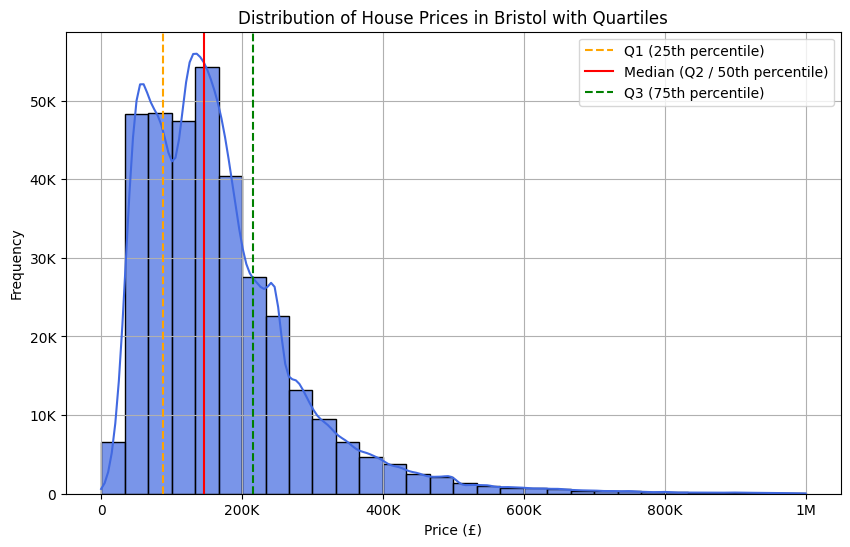

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_bristol[df_bristol['Price'] < 1000000]['Price'], bins=30, kde=True, color='royalblue', alpha=0.7)

# Add vertical lines for Q1, Median (Q2), and Q3
plt.axvline(Q1, color='orange', linestyle='--', label='Q1 (25th percentile)')
plt.axvline(Q2, color='red', linestyle='-', label='Median (Q2 / 50th percentile)')
plt.axvline(Q3, color='green', linestyle='--', label='Q3 (75th percentile)')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices in Bristol with Quartiles')
plt.legend()
plt.grid()
plt.show()


There are very expensive houses in Bristol, up to 50 million pounds!

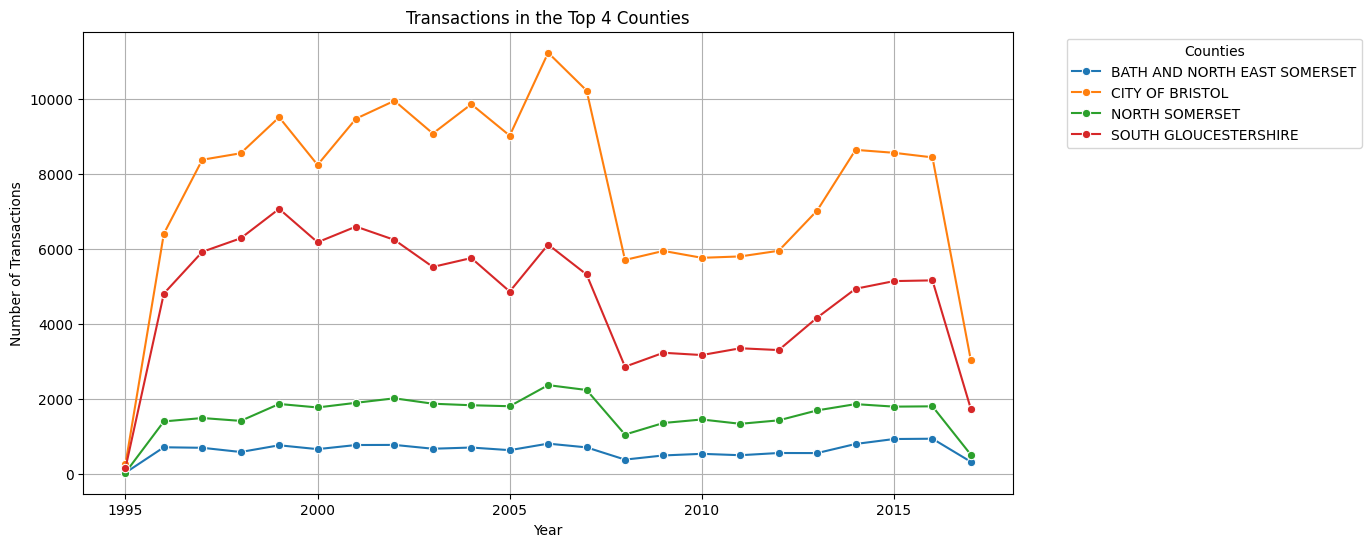

In [ ]:
year_counts_top4 = top4_couties.groupby(['Year','County']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=year_counts_top4, x='Year', y='Count', hue='County', marker='o')

plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.title('Transactions in the Top 4 Counties')
plt.legend(title='Counties', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

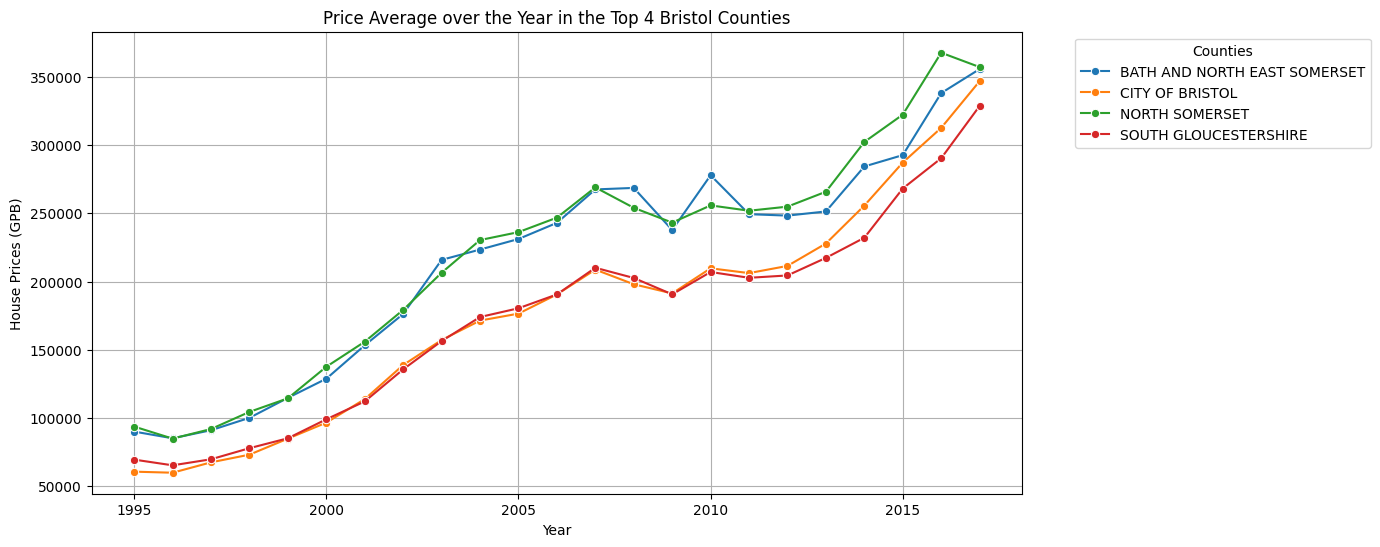

In [ ]:
top4_prices_per_county = top4_couties.groupby(['County','Year'])['Price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=top4_prices_per_county, x='Year', y='Price', hue='County', marker='o')

plt.xlabel('Year')
plt.ylabel('House Prices (GPB)')
plt.title('Price Average over the Year in the Top 4 Bristol Counties')
plt.legend(title='Counties', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

## Questions for further analysis

- How is the price average per County if don't consider houses above 1M? Which represents only 0.2% of the data in Bristol
- What Counties are the most expensive houses (above 1M)?
- Investigation on prices below 1000, is the data correct?